In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [4]:
df = pd.read_csv('stud_math.csv')

# Cleaning

In [5]:
df.score = df.score.apply(lambda x: x if x else None)
df.famrel = df.famrel.apply(lambda x: x if x > 0 else None)

In [6]:
df.dropna(subset=['score'], inplace=True)

In [7]:
# checking for high correlations
corr = df.corr()
for row in range(len(corr)):
    for col in range(row):
        val = corr.iloc[row, col]
        if abs(val) > 0.6:
            print(corr.columns[col], corr.index[row], val)

studytime studytime, granular -0.9999999999999968


In [8]:
# completely correlated with studytime
df.drop(columns='studytime, granular', inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD67232E80>,
      dtype=object)

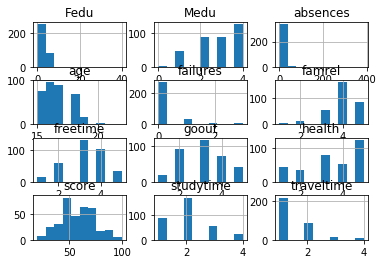

In [9]:
df.hist()

In [10]:
# removing surges
df.Fedu = df.Fedu.apply(lambda x: x if x in range(5) else None)
df.Medu = df.Medu.apply(lambda x: x if x in range(5) else None)
df.absences = df.absences.apply(lambda x: x if x < 20 else None)

In [11]:
def field_info(col):
    print(df[col].describe(), '\n')
    print(df[col].value_counts())
    df[col].hist()

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64 

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64


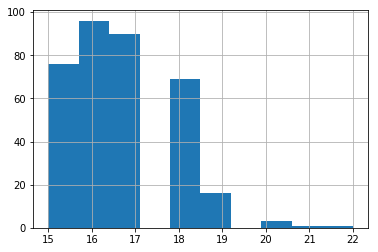

In [12]:
field_info('age')

In [13]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
count,352.000000,350.000000,330.000000,329.000000,345.000000,332.000000,327.000000,344.000000,346.000000,339.000000,321.000000,352.000000
mean,16.633523,2.811429,2.545455,1.428571,2.046377,0.271084,3.957187,3.235465,3.086705,3.516224,4.934579,57.755682
std,1.256011,1.091192,1.080102,0.690907,0.840919,0.667779,0.881648,1.004258,1.091998,1.412812,4.748561,16.200928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,2.000000,45.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,19.000000,100.000000


In [14]:
for name, data in df.iteritems():
    if data.dtypes == 'object':
        data.value_counts()

GP    311
MS     41
Name: school, dtype: int64

F    182
M    170
Name: sex, dtype: int64

U    265
R     73
Name: address, dtype: int64

GT3    228
LE3    100
Name: famsize, dtype: int64

T    277
A     34
Name: Pstatus, dtype: int64

other       115
services     90
teacher      51
at_home      49
health       30
Name: Mjob, dtype: int64

other       176
services     89
teacher      26
health       15
at_home      14
Name: Fjob, dtype: int64

course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64

mother    225
father     78
other      20
Name: guardian, dtype: int64

no     295
yes     48
Name: schoolsup, dtype: int64

yes    196
no     120
Name: famsup, dtype: int64

no     170
yes    146
Name: paid, dtype: int64

yes    172
no     168
Name: activities, dtype: int64

yes    272
no      68
Name: nursery, dtype: int64

yes    320
no      13
Name: higher, dtype: int64

yes    274
no      49
Name: internet, dtype: int64

no     219
yes    104
Name: romantic, dtype: int64

# Analysis

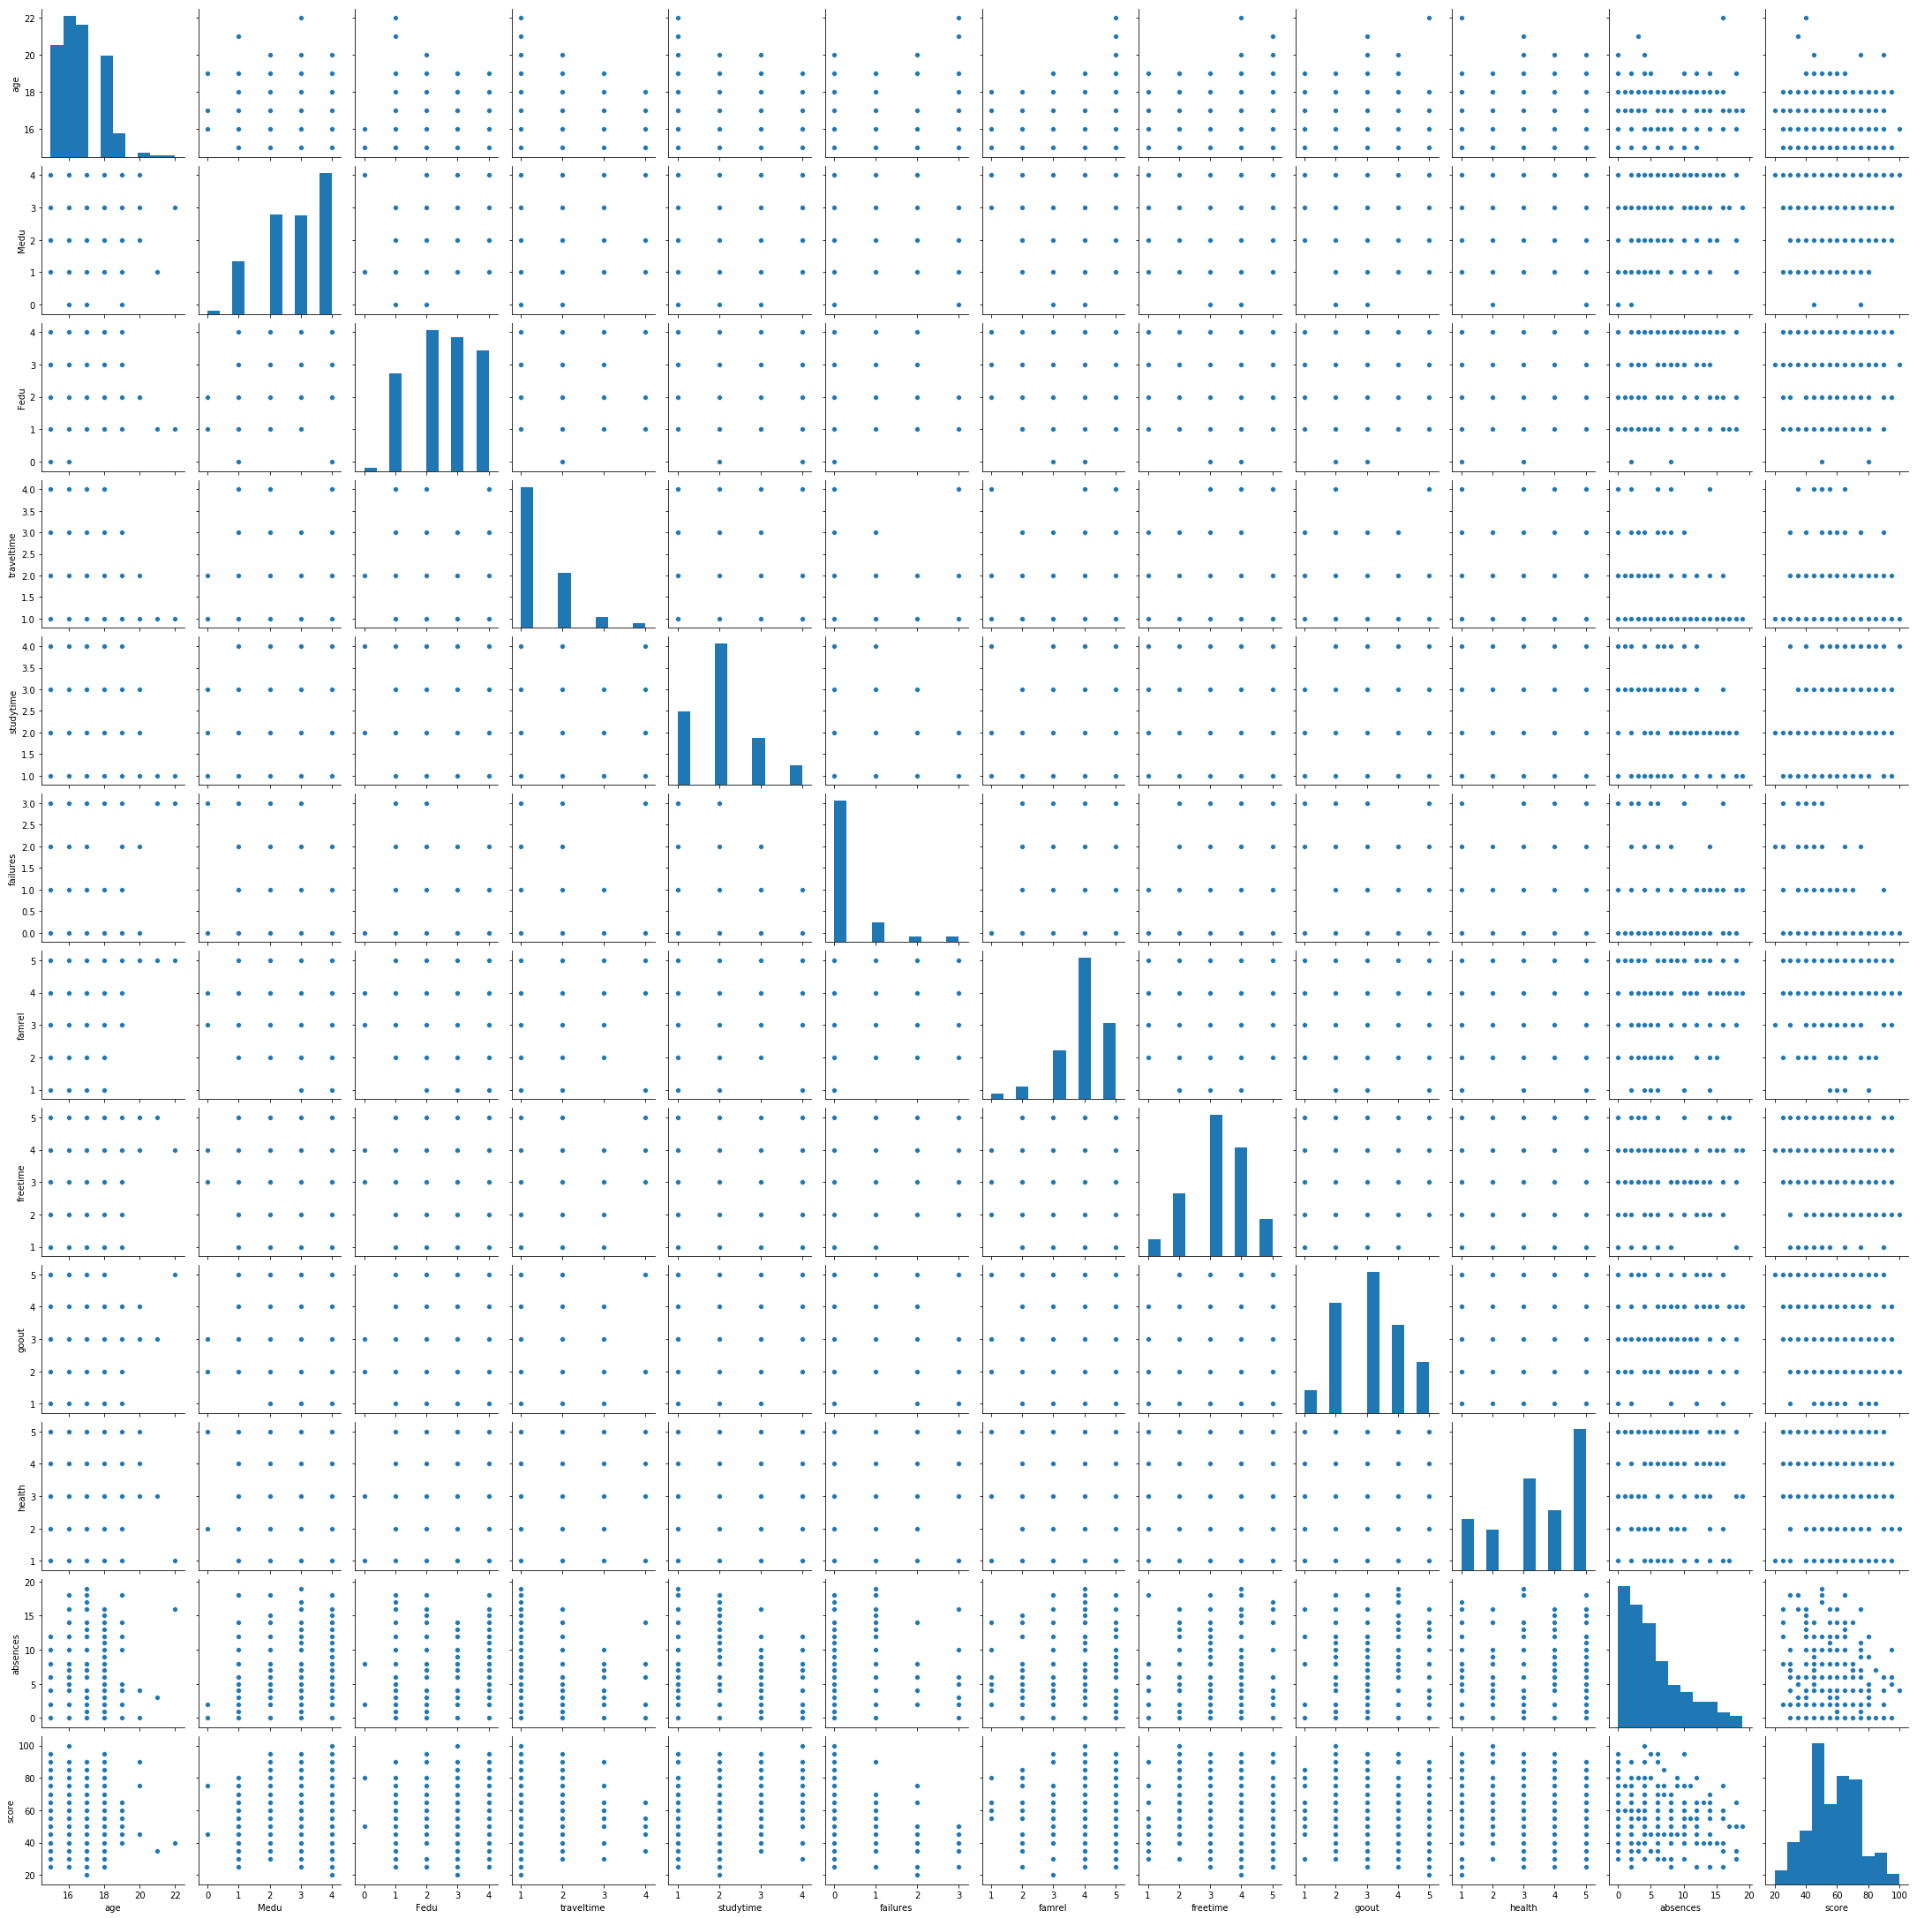

In [15]:
sns.pairplot(df)

In [16]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

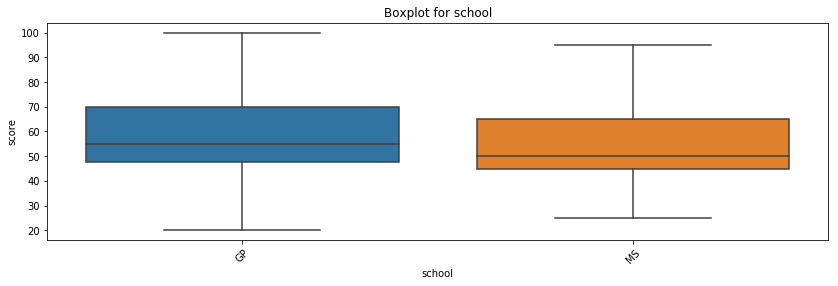

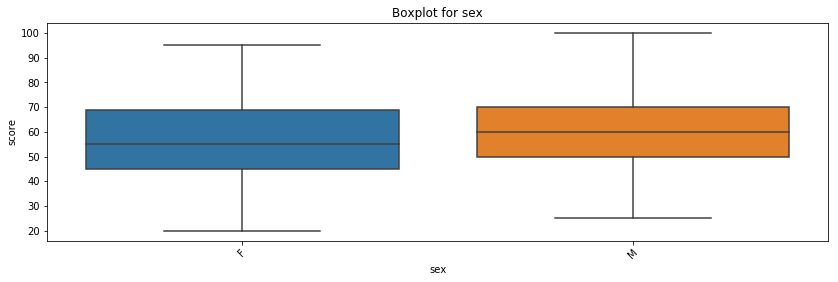

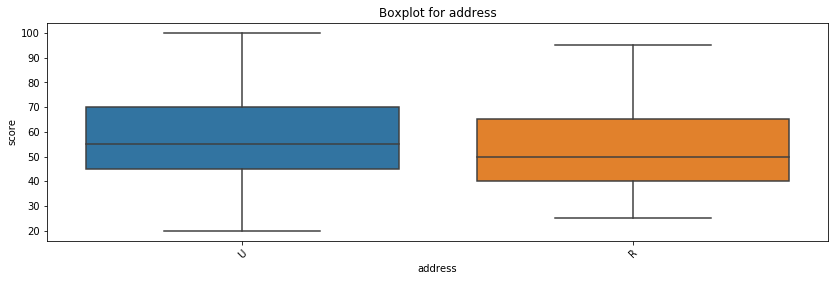

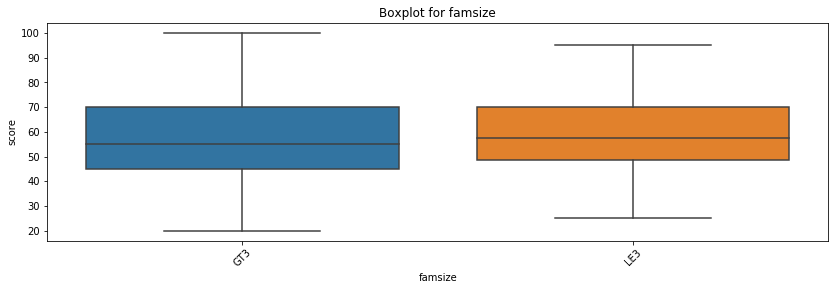

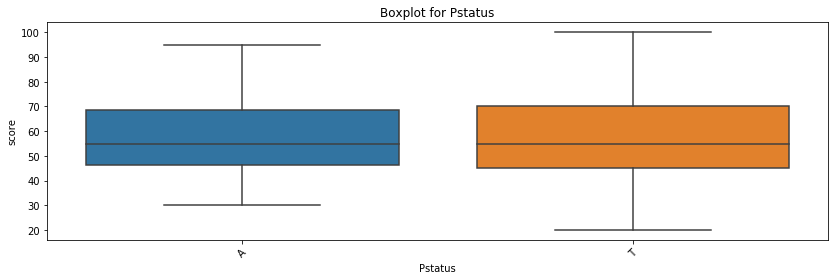

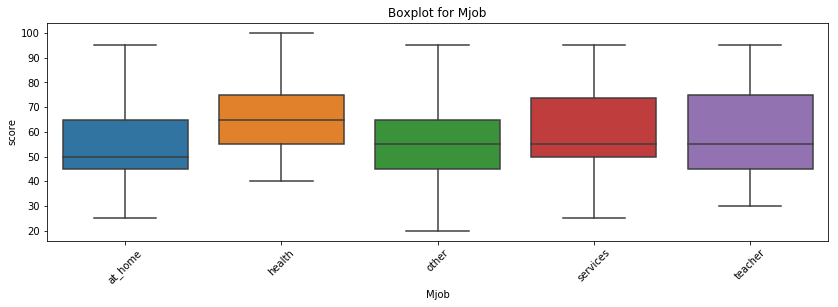

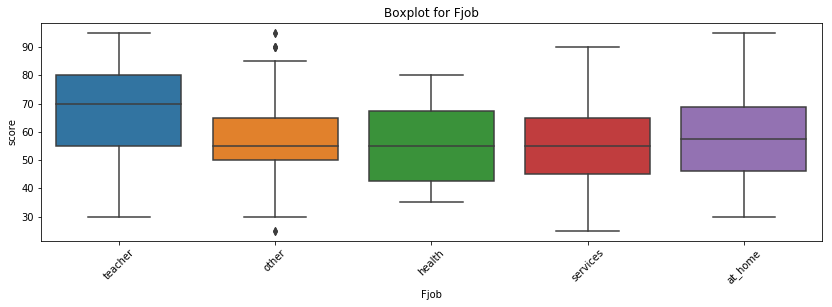

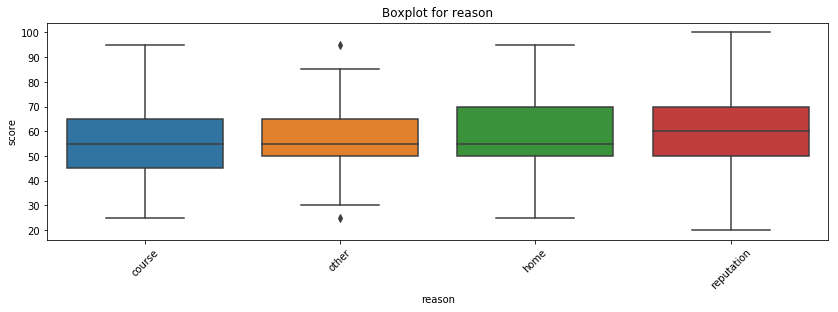

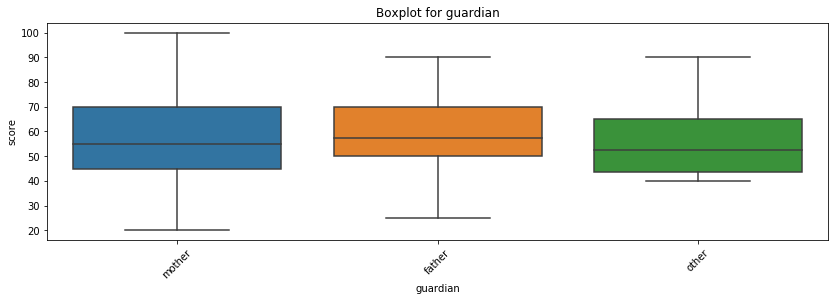

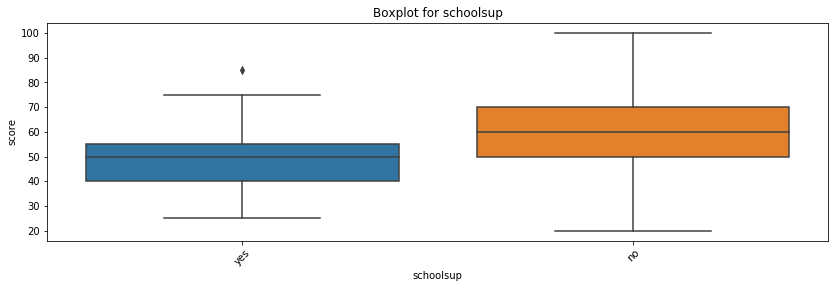

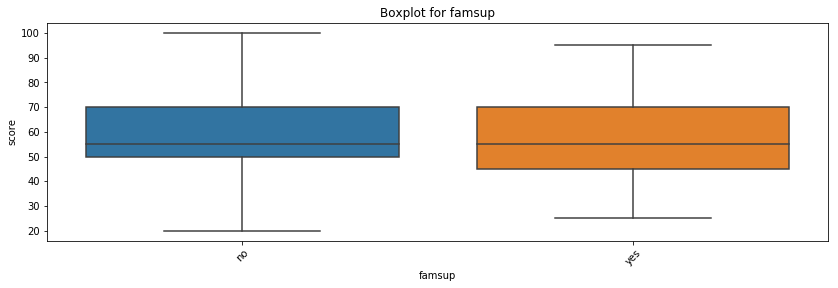

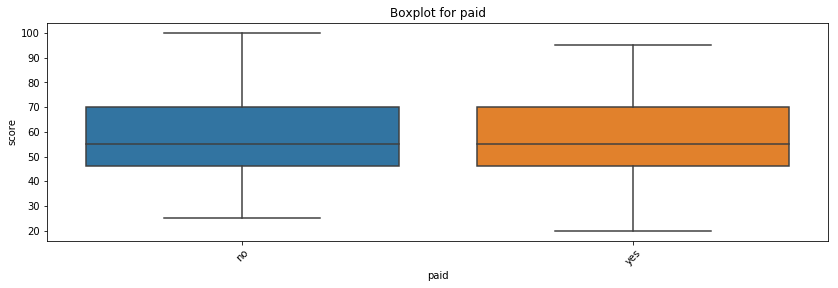

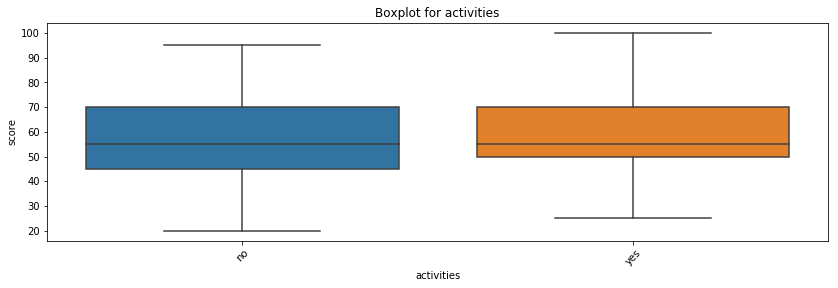

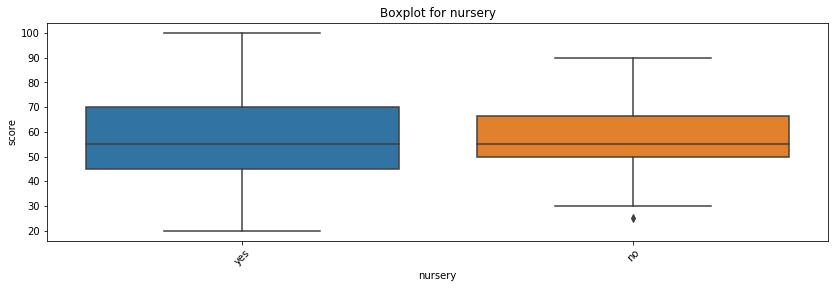

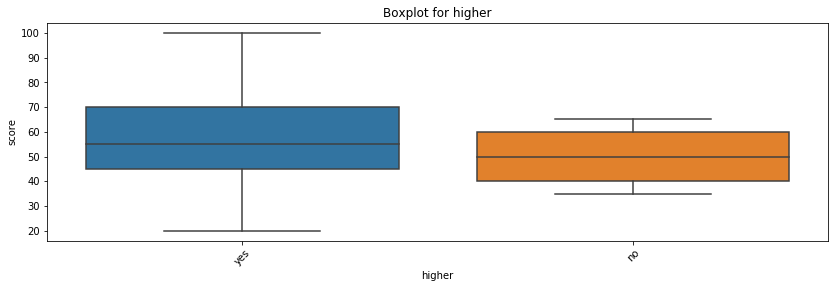

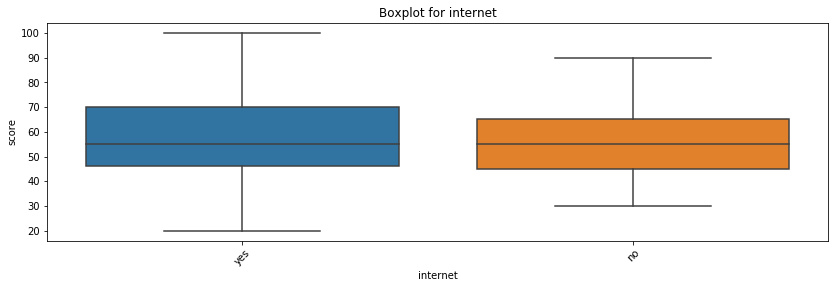

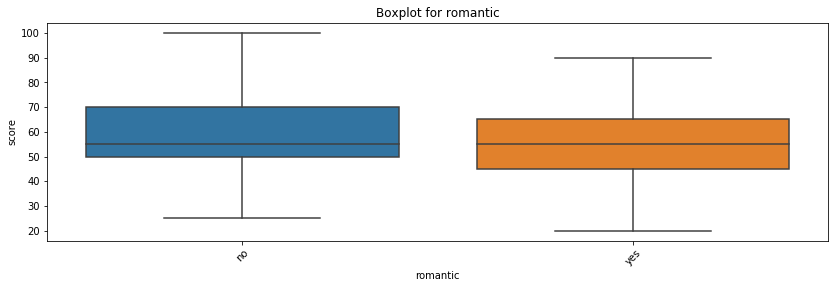

In [17]:
for col in df.columns:
    if df[col].dtypes == 'O':
        get_boxplot(col)

In [18]:
# these columns seem irrelevant so dropping them
df.drop(columns=['Pstatus', 'paid', 'famsize'], inplace=True)

# Выводы

1. Поле "Studytime, granular" избыточное, полностью коррелирует со Studytime
2. Поля Pstatus, paid, famsize слабо связаны со score
3. Наиболее перспективны для анализа поля Mjob, Fjob, schoolsup
4. Выбросы найдены в полях Medu, Fedu, absences. Устранены